# Coinmarketcap Scraper 

Cryptocurrency price varies from markets to markets. When a customer have the need of purchasing, 

First scrape the list of all crypto currencies.

Then based on the choice, scrape the market information

In [9]:
import requests
from bs4 import BeautifulSoup
import os
import csv
import sys
import re

def downloadMarketInfo(stats_file_path):
    exist = os.path.exists(stats_file_path)
    if not exist:
        os.makedirs(stats_file_path)
    page = requests.get("https://coinmarketcap.com/")
    soup = BeautifulSoup(page.content, 'html.parser')
    header = []
    body = []
    for string in soup.thead.strings:
        if string != '\n':
            header.append(string)
    header.insert(1, 'abbr')
    header.insert(7, 'abbr')
    for string in soup.tbody.strings:
        if string != '\n':
            temp = string.replace('\n', '')
            if '*' in temp:
                continue
            body.append(temp)
    
    lines = []
    imgtag = soup.tbody.findAll('img')
    f = 0
    for anchor in imgtag:
        if f == 1:
            lines.append(anchor['src'])
            f = 0
        else:
            f=1 
    rows = []
    i = 9
    k = 0
    rows.append(header)
    while i < len(body):
        sublist = body[i-9:i]
        sublist.append('<img class = \"line\" src=\"' +lines[k] + '\">')
        rows.append(sublist)
        i += 9
        k += 1
    with open(stats_file_path + 'Market.csv', 'w',newline='') as myFile:
        writer = csv.writer(myFile, dialect= 'excel')
        #print(rows)
        writer.writerows(rows)


def downloadCoinInfo(name, stats_file_path):
    exist = os.path.exists(stats_file_path)
    if not exist:
        os.makedirs(stats_file_path)
    page = requests.get("https://coinmarketcap.com/currencies/"+ name +"/#markets")
    soup = BeautifulSoup(page.content, 'html.parser')
    header = []
    body = []
    if soup.thead is None:
        return
    for string in soup.thead.strings:
        if string != '\n':
            header.append(string)
    for string in soup.tbody.strings:
        if string != '\n':
            temp = string.replace('\n', '')
            if '*' in temp:
                continue
            body.append(temp)
    header.insert(6, '%')
    rows = []
    rows.append(header)
    i = 8
    while i < len(body):
        rows.append(body[i - 8:i])
        i += 8
    with open(stats_file_path + name + '.csv', 'w',newline='') as myFile:
        writer = csv.writer(myFile, dialect='excel')
        writer.writerows(rows)

downloadMarketInfo("downloads/")
downloadBTCInfo("bitcoin", "downloads/")
downloadCoinInfo("ethereum", "downloads/")
downloadCoinInfo("ripple", "downloads/")
downloadCoinInfo("litecoin", "downloads/")


 Based on market information, read from CSV and give out analysis:
 1. what's current status of the cryptocurrencies?
 2. what would be the best market to purchase from currently?

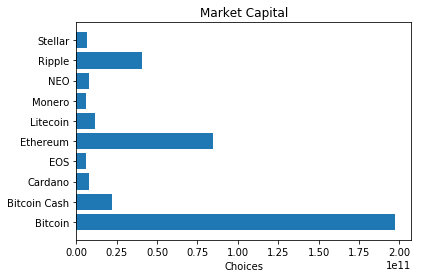

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

def marketcap(pdmkt):
    pd.set_option('display.max_colwidth', -1)
    reviews = pd.read_csv(pdmkt)
    df1 = reviews.head(10).copy()
    df1['capint'] = df1['Market Cap'].str.replace(',', '')
    df1['capint'] = df1['capint'].str.replace('$', '')
    df1['capint'] = df1['capint'].astype(float)
    fig, ax = plt.subplots()
    q1 = ax.barh(df1['Name'], df1['capint'])
    ax.set_title('Market Capital')
    ax.set_xlabel('Choices')
    display((df1.reset_index(drop=True)).style)
    plt.show()

marketcap("downloads/Market.csv")


In [11]:
In the above form and chart the market information is shown.

By choosing the name of the cryptocurrency, The user could check the detail of the specific cryptocurrency.

SyntaxError: invalid syntax (<ipython-input-11-14111f58f387>, line 1)

    #    Source      Pair   Volume (24h)       Price  Volume (%)  %   Updated
0  1   OKEx      BTC/USDT  $520,701,000   $11701.30   8.06        %  Recently
1  2   Bitfinex  BTC/USD   $323,261,000    $11657.00  5.00        %  Recently
2  3   Binance   XRP/BTC   $194,301,000   $11673.90   3.01        %  Recently
3  4   Binance   BTC/USDT  $176,914,000   $11695.00   2.74        %  Recently
4  5   OKEx      ETH/BTC   $170,839,000   $11664.40   2.64        %  Recently
5  6   Huobi     BTC/USDT  $170,442,000   $11684.60   2.64        %  Recently
6  7   Upbit     BTC/KRW   $164,856,000   $11866.40   2.55        %  Recently
7  8   bitFlyer  BTC/JPY   $160,958,000   $11717.40   2.49        %  Recently
8  9   Bithumb   BTC/KRW   $155,769,000   $11869.20   2.41        %  Recently
9  10  OKEx      LTC/BTC   $147,540,000   $11630.70   2.28        %  Recently


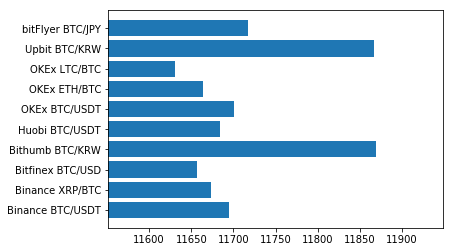

    #    Source      Pair  Volume (24h)    Price  Volume (%)  %      Updated
0  1   OKEx      ETH/USDT  $177,954,000  $864.42  9.45        %  Recently   
1  2   OKEx      ETH/BTC   $170,839,000  $858.77  9.07        %  Recently   
2  3   Binance   ETH/BTC   $71,765,500   $858.03  3.81        %  Recently   
3  4   Huobi     ETH/USDT  $65,318,600   $863.51  3.47        %  Recently   
4  5   Huobi     OCN/ETH   $63,104,400   $857.41  3.35        %  Recently   
5  6   Huobi     TRX/ETH   $52,605,100   $860.71  2.79        %  Recently   
6  7   Bitfinex  ETH/USD   $52,496,200   $861.87  2.79        %  Recently   
7  8   Bit-Z     ETH/BTC   $47,239,500   $869.35  0.00        %  3 hours ago
8  9   Huobi     HT/ETH    $41,932,100   $860.47  2.23        %  Recently   
9  10  HitBTC    ETH/BTC   $38,777,200   $859.34  2.06        %  Recently   


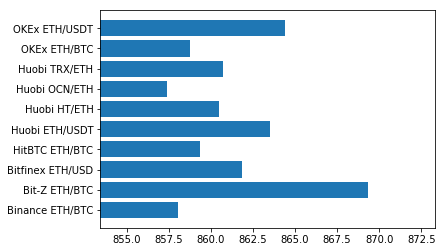

    #    Source      Pair   Volume (24h)  Price  Volume (%)  %   Updated
0  1   Bithumb   XRP/KRW   $550,568,000   $1.04  29.71       %  Recently
1  2   Binance   XRP/BTC    $194,301,000  $1.02  10.49       %  Recently
2  3   Upbit     XRP/KRW   $166,739,000   $1.05  9.00        %  Recently
3  4   Bitfinex  XRP/USD   $142,479,000   $1.02  7.69        %  Recently
4  5   Huobi     XRP/USDT  $84,667,700    $1.03  4.57        %  Recently
5  6   Bitbank   XRP/JPY   $78,403,400    $1.03  4.23        %  Recently
6  7   Coinone   XRP/KRW   $78,310,300    $1.05  4.23        %  Recently
7  8   Bitstamp  XRP/USD   $46,766,800    $1.03  2.52        %  Recently
8  9   Poloniex  XRP/BTC   $45,042,400    $1.02  2.43        %  Recently
9  10  OKEx      XRP/USDT  $41,504,400    $1.03  2.24        %  Recently


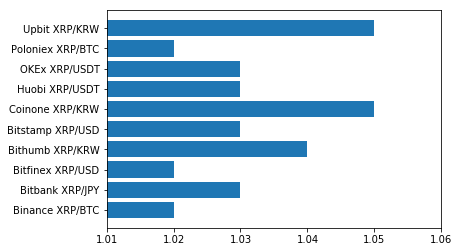

    #     Source      Pair  Volume (24h)    Price  Volume (%)  %      Updated
0  1   OKEx       LTC/USDT  $152,971,000  $213.41  25.01       %  Recently   
1  2   OKEx       LTC/BTC   $147,540,000  $212.46  24.12       %  Recently   
2  3   GDAX       LTC/USD   $37,284,800   $212.23  6.09        %  Recently   
3  4   Bitfinex   LTC/USD   $24,289,500   $212.77  3.97        %  Recently   
4  5   Bit-Z      LTC/BTC   $21,750,800   $215.17  0.00        %  3 hours ago
5  6   Huobi      LTC/USDT  $19,871,100   $213.16  3.25        %  Recently   
6  7   Binance    LTC/USDT  $17,584,800   $213.24  2.87        %  Recently   
7  8   Binance    LTC/BTC   $15,712,100   $211.96  2.57        %  Recently   
8  9   Bithumb    LTC/KRW   $12,852,300   $216.41  2.10        %  Recently   
9  10  CoinsBank  LTC/USD   $11,323,500   $212.50  1.85        %  Recently   


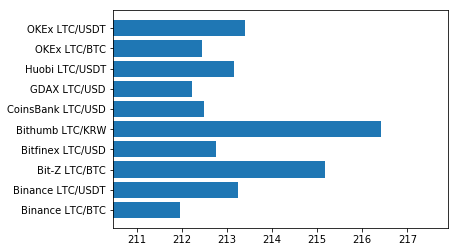

In [13]:
 def marketchart(name):
    reviews = pd.read_csv('downloads/'+ name + '.csv')
    reviews.head(10)
    df1 = reviews.head(10).copy()
    print(df1)
    df1['pint'] = df1['Price'].str.replace(',', '')
    df1['pint'] = df1['pint'].str.replace('$', '')
    df1['pint'] = df1['pint'].astype(float)
    plt.barh(df1['Source'] +' '+  df1['Pair'], df1['pint'])
    min = df1['pint'].min()
    max = df1['pint'].max()
    range = max - min
    plt.xlim(min - range/3, max + range/3)
    plt.show()

marketchart('bitcoin')
marketchart('ethereum')
marketchart('ripple')
marketchart('litecoin')